<a href="https://colab.research.google.com/github/lromeror/DataVisualization/blob/main/VisualMultiVariables/Multivariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy as sp

In [44]:
df=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/VisualMultiVariables/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##Scatter Plot
- Muestra Aletoria del dataset

Existira alguna correlacion?

In [45]:
plt.style.use('seaborn-whitegrid')

<ipython-input-45-adcf1482bdd0>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

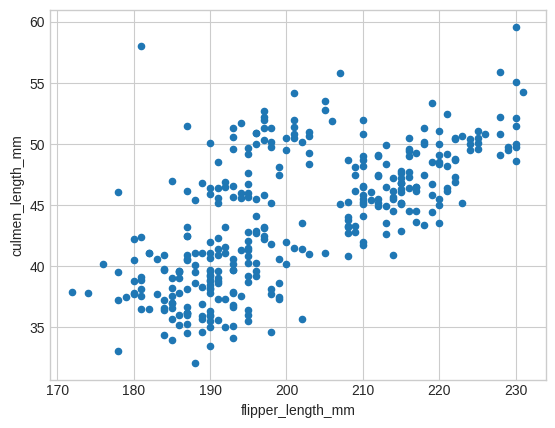

In [46]:
df.plot.scatter(x='flipper_length_mm',y='culmen_length_mm')

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

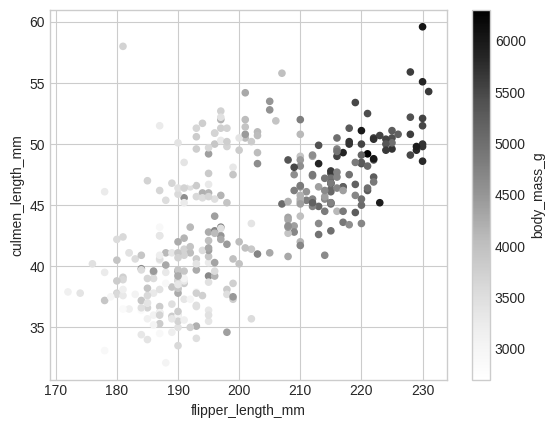

In [47]:
df.plot.scatter(x='flipper_length_mm',y='culmen_length_mm',c='body_mass_g')

In [48]:
fig=px.scatter(df,x='flipper_length_mm',y='culmen_length_mm',color='species')
fig.update_layout(
    width=900,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig.show()

Grafico de dispersion categorico

In [49]:
sns.set_style('whitegrid')

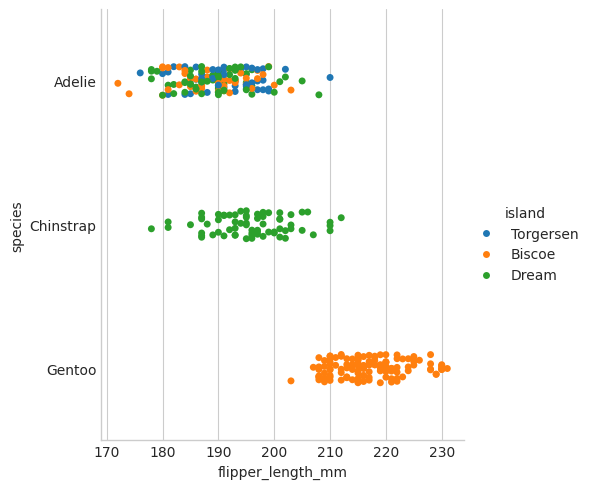

In [50]:
sns.catplot(data=df,x='flipper_length_mm',y='species', hue='island')# Se ve cuantos punto hay en una variable categorica con respecto a una cantidad
#Catplot, muy interesante para ver como se reparte en conjunto

## Regresion

- Es un Scatter plot
- Tiene una linea de tendencia "Line of Best Fit"
- Variables Numericas
- Distribucion de las variables
- No usar cuando se tiene demasiados puntos

Calculando el coeficiente de correlacion:
- p < 0.05 (p-value) es Check Se cumple la hipotesis

In [51]:
# Eliminar filas con NaN en las columnas específicas
df_clean = df[['flipper_length_mm', 'culmen_length_mm']].dropna()

# Calcular la correlación de Pearson
r, p = sp.stats.pearsonr(df_clean['flipper_length_mm'], df_clean['culmen_length_mm'])
r,p

(0.656181340746428, 1.7439736176204127e-43)

Text(220, 38, 'p =1.743')

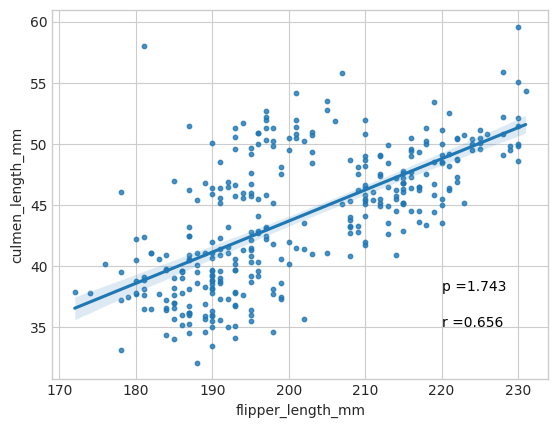

In [52]:
sns.regplot(data=df,x='flipper_length_mm',y='culmen_length_mm',scatter_kws={'s':10})
plt.text(220,35,f'r ={str(r)[0:5]}',color='black')
plt.text(220,38,f'p ={str(p)[0:5]}',color='black')

Especie Gentoo

In [53]:
df_gentoo=df[df['species']=='Gentoo']
df_gentoo = df_gentoo[['flipper_length_mm', 'culmen_length_mm']].dropna()
r, p = sp.stats.pearsonr(df_gentoo['flipper_length_mm'], df_gentoo['culmen_length_mm'])
r,p

(0.6611621224825641, 8.597007825179033e-17)

Text(225, 43, 'p =8.597')

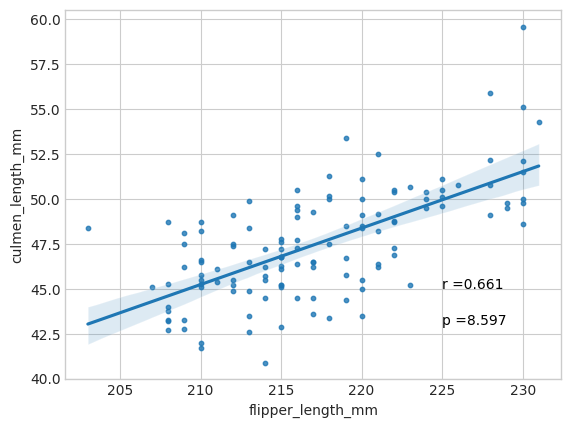

In [54]:
sns.regplot(df_gentoo,x='flipper_length_mm',y='culmen_length_mm',scatter_kws={'s':10})
plt.text(225,45,f'r ={str(r)[0:5]}',color='black')
plt.text(225,43,f'p ={str(p)[0:5]}',color='black')

Especie Adelie

In [55]:
df_adelie=df[df['species']=='Adelie']
df_adelie = df_adelie[['flipper_length_mm', 'culmen_length_mm']].dropna()
r, p = sp.stats.pearsonr(df_adelie['flipper_length_mm'], df_adelie['culmen_length_mm'])
r,p

(0.3257847151651594, 4.465484645884534e-05)

Los datos que proporcionaste parecen ser el coeficiente de correlación de Pearson y el valor p de una regresión lineal:

Coeficiente de correlación de Pearson (r = 0.3258): Este valor indica la fuerza y la dirección de la relación lineal entre dos variables. En este caso, un valor de 0.3258 sugiere una correlación positiva moderada entre las variables. Esto significa que, en general, a medida que una variable aumenta, la otra también tiende a aumentar, aunque no de manera muy fuerte.

Valor p (p = 4.465e-05): El valor p indica la significancia estadística de la correlación. Un valor p muy pequeño (como este, que es mucho menor que el nivel comúnmente utilizado de 0.05) indica que hay suficiente evidencia para rechazar la hipótesis nula de que no hay correlación entre las dos variables. En otras palabras, es muy poco probable que esta correlación observada haya ocurrido por casualidad.

Text(205, 34, 'p =4.465')

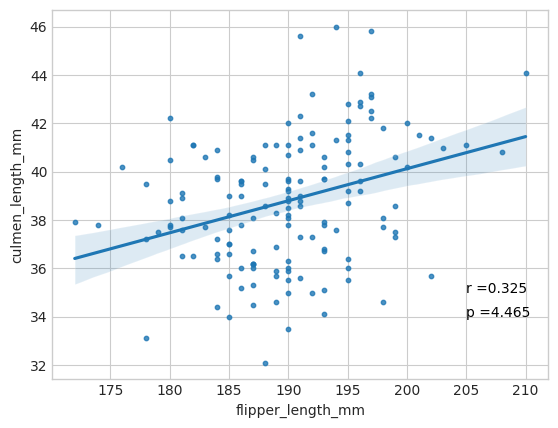

In [56]:
sns.regplot(df_adelie,x='flipper_length_mm',y='culmen_length_mm',scatter_kws={'s':10})
plt.text(205,35,f'r ={str(r)[0:5]}',color='black')
plt.text(205,34,f'p ={str(p)[0:5]}',color='black')

##JoinPlot

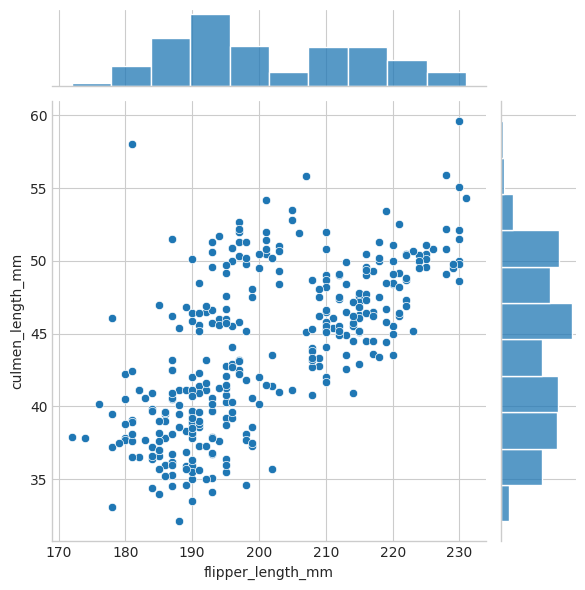

In [57]:
sns.jointplot(data=df,x='flipper_length_mm',y='culmen_length_mm')

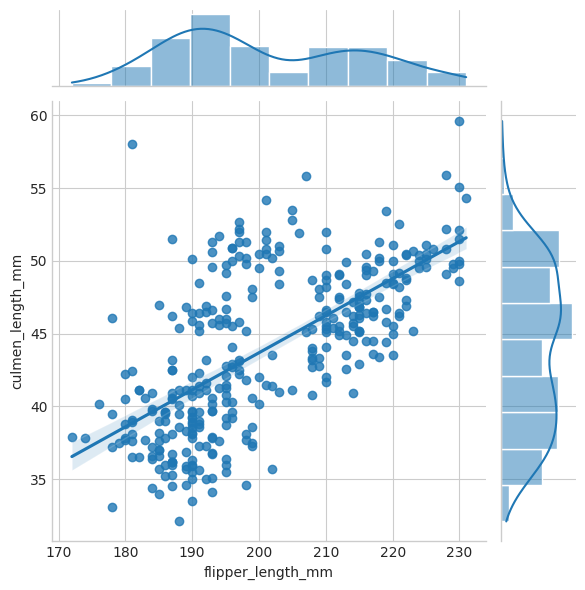

In [58]:
sns.jointplot(data=df,x='flipper_length_mm',y='culmen_length_mm',kind='reg')

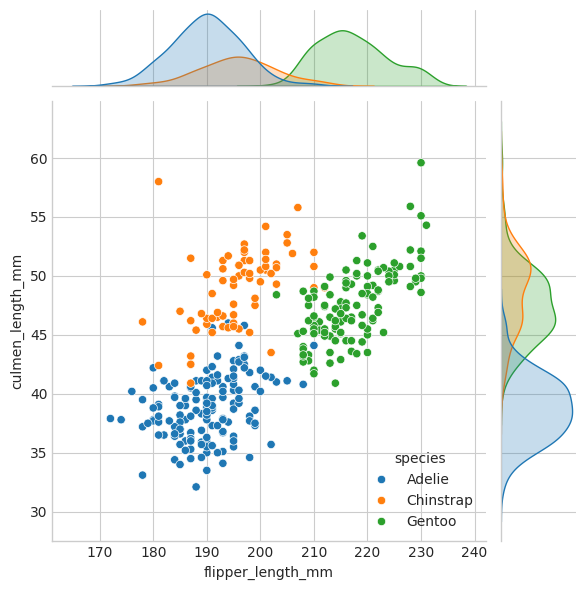

In [59]:
sns.jointplot(data=df,x='flipper_length_mm',y='culmen_length_mm',hue='species')

##Pairplot

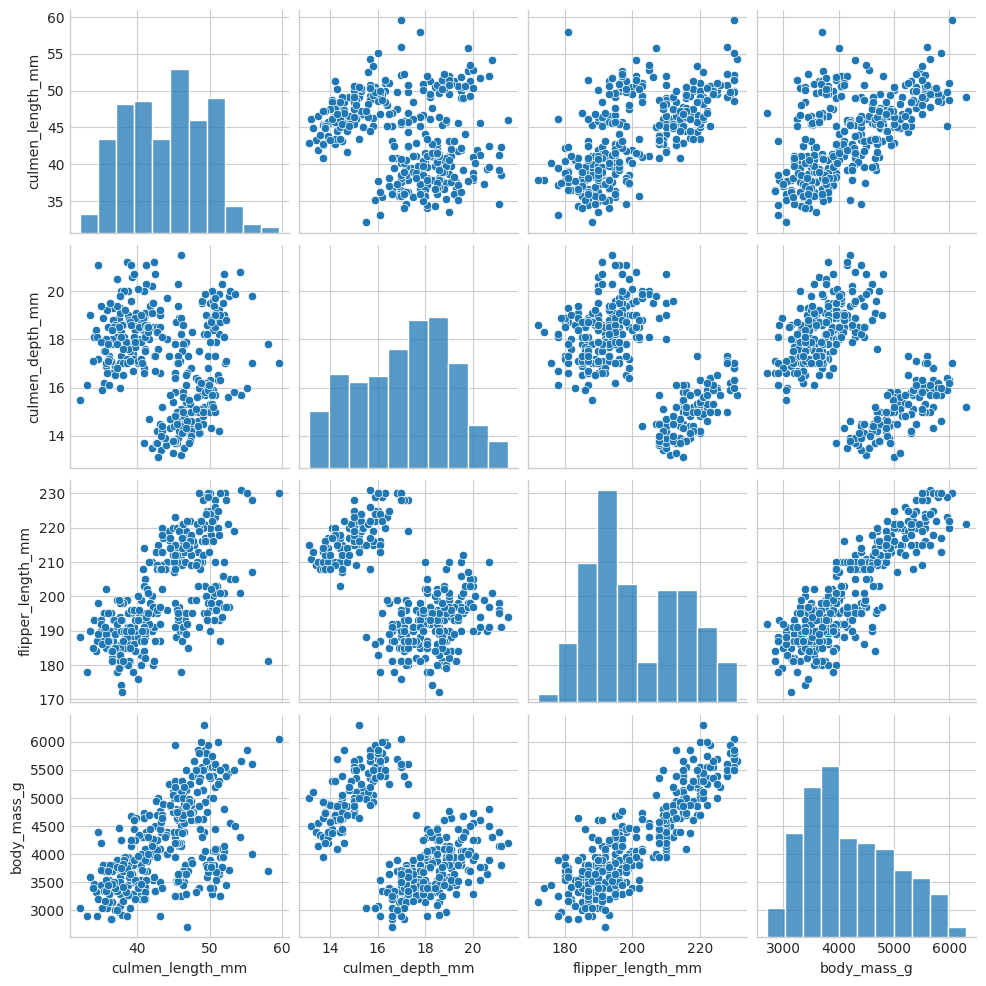

In [60]:
sns.pairplot(df)

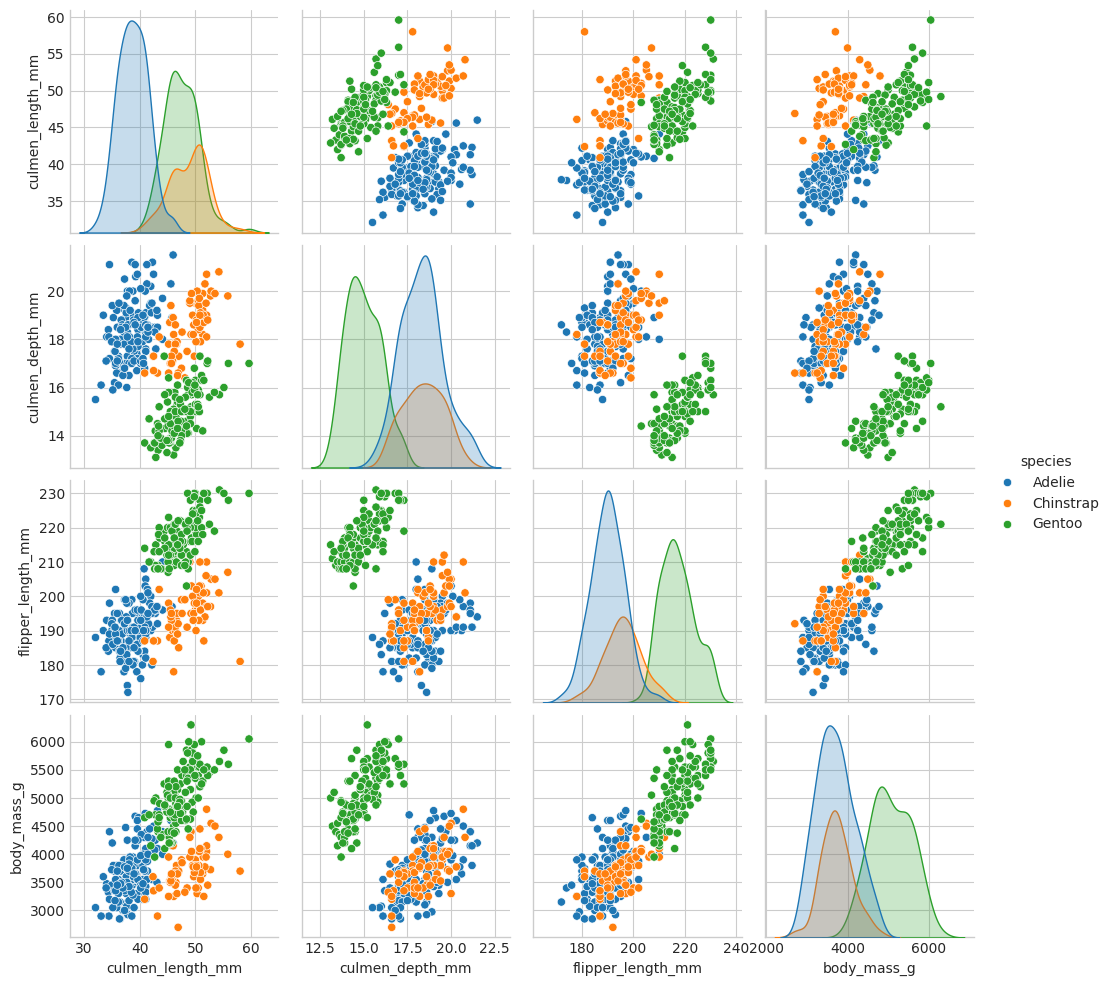

In [61]:
sns.pairplot(df,hue='species')

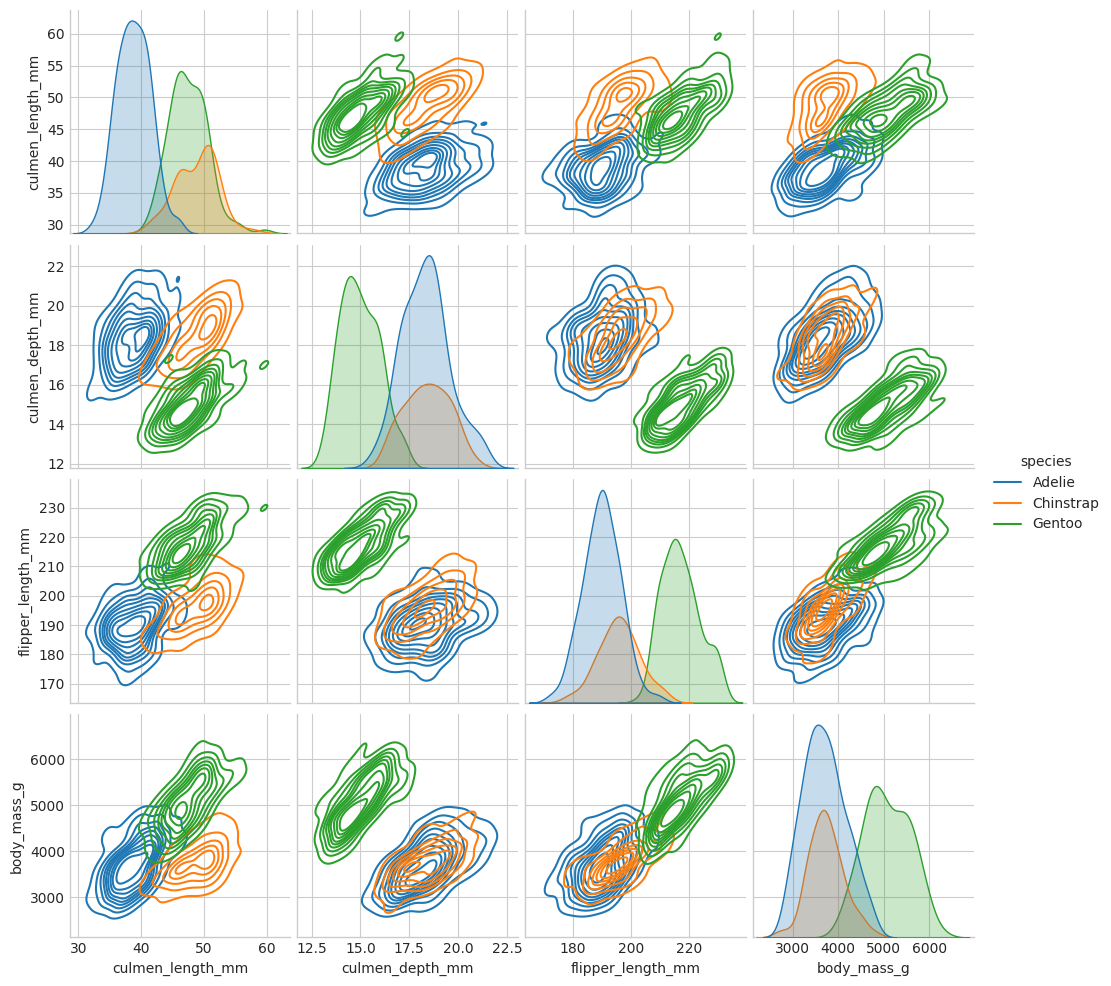

In [62]:
sns.pairplot(df,hue='species',kind='kde')

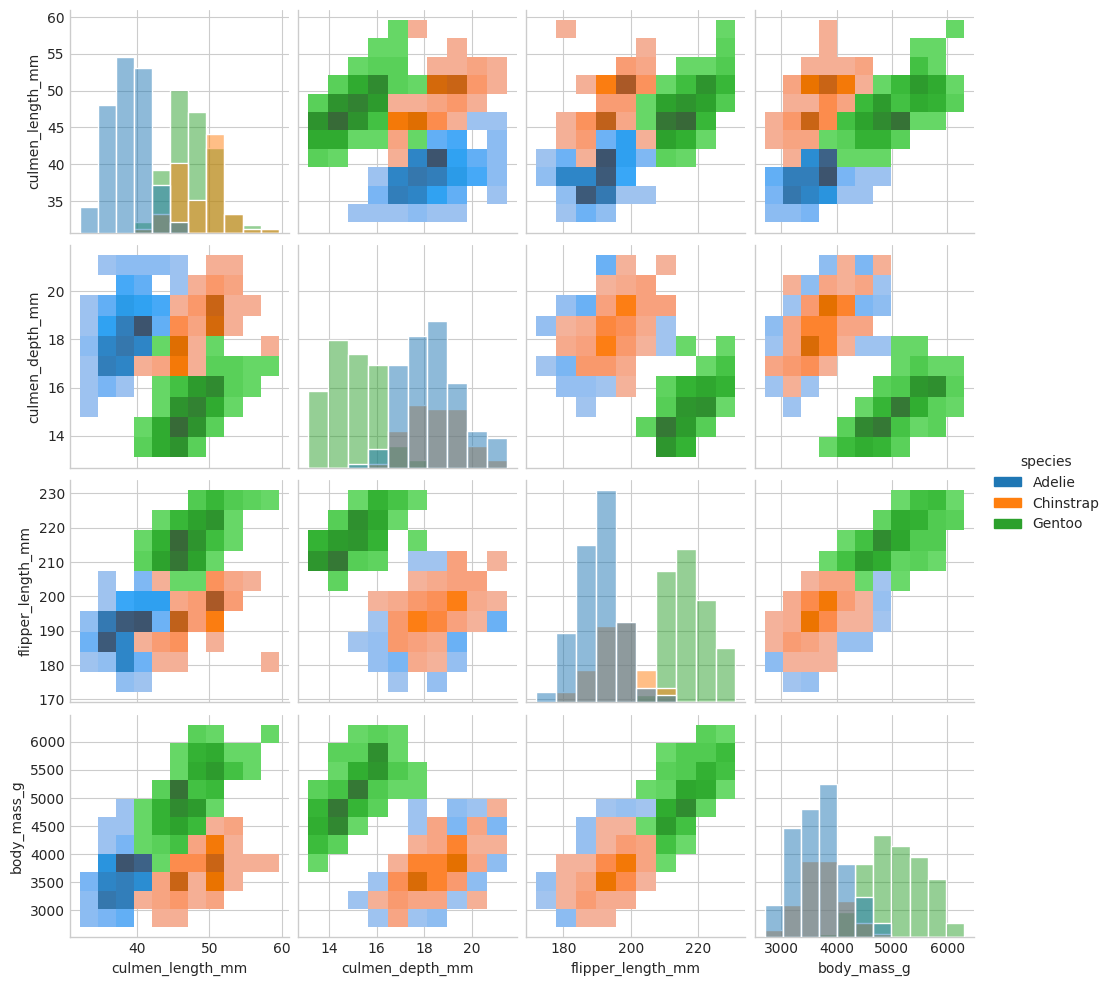

In [63]:
sns.pairplot(df,hue='species',kind='hist')

##Radar Chart
- Normalizar los datos
- Apilamiento maximo es de 2
- Poco uso de variables

In [64]:
dfre=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/VisualMultiVariables/restaurantes.csv')
dfre

,Nombre,Comida,Variedad,Servicio,Ambiente,Precio
0,Restaurante 1,4,4,5,4,3
1,Restaurante 2,5,5,4,5,2
2,Restaurante 3,3,4,5,3,5


In [65]:
dfre.iloc[0,1:]

,0
Comida,4
Variedad,4
Servicio,5
Ambiente,4
Precio,3


In [72]:
categorias=['Comida','Variedad','Servicio','Ambiente','Precio']
fig=go.Figure()
fig.add_trace(go.Scatterpolar(r=dfre.iloc[0,1:],theta=categorias,fill='toself',name='Precio'))
fig.update_layout(
    width=900,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig

In [73]:
categorias=['Comida','Variedad','Servicio','Ambiente','Precio']
fig.add_trace(go.Scatterpolar(r=dfre.iloc[1,1:],theta=categorias,fill='toself',name='Restaurant'))
fig.update_layout(
    width=900,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig

In [68]:
meandf=df.groupby('species').agg({'flipper_length_mm':'mean','culmen_length_mm':'mean','body_mass_g':'mean','culmen_depth_mm':'mean'})
meandf

,flipper_length_mm,culmen_length_mm,body_mass_g,culmen_depth_mm
species,,,,
Adelie,189.953642,38.791391,3700.662252,18.346358
Chinstrap,195.823529,48.833824,3733.088235,18.420588
Gentoo,217.186992,47.504878,5076.016260,14.982114


In [81]:
categorias=meandf.columns
fig2=go.Figure()
fig2.add_trace(go.Scatterpolar(r=meandf.iloc[0,:],theta=categorias,fill='toself',name='Adelie'))
fig2.add_trace(go.Scatterpolar(r=meandf.iloc[1,:],theta=categorias,fill='toself',name='Chisntrap'))
fig2.add_trace(go.Scatterpolar(r=meandf.iloc[2,:],theta=categorias,fill='toself',name='Gentoo'))
fig2.update_layout(
    width=900,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig2

Hay que normalizar
- Normalizacion Min-Max

In [86]:
# Selecciona solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Aplica la normalización solo a las columnas numéricas
dfNorm = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())
dfNorm['species']=df['species']
dfNorm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,0.254545,0.666667,0.152542,0.291667,Adelie
1,0.269091,0.511905,0.237288,0.305556,Adelie
2,0.298182,0.583333,0.389831,0.152778,Adelie
3,NaN,NaN,NaN,NaN,Adelie
4,0.167273,0.738095,0.355932,0.208333,Adelie
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,Gentoo
340,0.534545,0.142857,0.728814,0.597222,Gentoo
341,0.665455,0.309524,0.847458,0.847222,Gentoo
342,0.476364,0.202381,0.677966,0.694444,Gentoo


In [87]:
meandf=dfNorm.groupby('species').agg({'flipper_length_mm':'mean','culmen_length_mm':'mean','body_mass_g':'mean','culmen_depth_mm':'mean'})
meandf

,flipper_length_mm,culmen_length_mm,body_mass_g,culmen_depth_mm
species,,,,
Adelie,0.304299,0.243323,0.277962,0.624566
Chinstrap,0.403789,0.608503,0.286969,0.633403
Gentoo,0.765881,0.560177,0.660005,0.224061


In [88]:
categorias=meandf.columns
fig2=go.Figure()
fig2.add_trace(go.Scatterpolar(r=meandf.iloc[0,:],theta=categorias,fill='toself',name='Adelie'))
fig2.add_trace(go.Scatterpolar(r=meandf.iloc[1,:],theta=categorias,fill='toself',name='Chisntrap'))
fig2.add_trace(go.Scatterpolar(r=meandf.iloc[2,:],theta=categorias,fill='toself',name='Gentoo'))
fig2.update_layout(
    width=900,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig2

##Grafico de Burbujas (+Ejes Logaritmicos)

In [93]:
dfpaises=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/VisualMultiVariables/paises_vida.csv',index_col='index')
dfpaises=dfpaises.dropna()
dfpaises

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [97]:
df2002=dfpaises[dfpaises['year']==2002]
df2002

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
10,Afghanistan,Asia,2002,42.129,25268405,726.734055,AFG,4
22,Albania,Europe,2002,75.651,3508512,4604.211737,ALB,8
34,Algeria,Africa,2002,70.994,31287142,5288.040382,DZA,12
46,Angola,Africa,2002,41.003,10866106,2773.287312,AGO,24
58,Argentina,Americas,2002,74.340,38331121,8797.640716,ARG,32
...,...,...,...,...,...,...,...,...
1654,Vietnam,Asia,2002,73.017,80908147,1764.456677,VNM,704
1666,West Bank and Gaza,Asia,2002,72.370,3389578,4515.487575,PSE,275
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,YEM,887


Forma Logaritmica

In [101]:
fig=px.scatter(df2002,x='gdpPercap',y='lifeExp',color='continent',size='pop',size_max=60)
fig.update_layout(
    width=850,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig.show()

Cambiar ejes para que se acople a una linealidad solamente para la visualizacion, Es decir yo mando a una escala diferente para exista una relacion. Pero es de forma exponencial


Se puede aplicar una regresión lineal a los datos que has transformado con log_x=True. La transformación logarítmica del eje x ayuda a linearizar relaciones no lineales, facilitando el ajuste de una regresión lineal.

Para aplicar la regresión lineal después de la transformación logarítmica, sigue estos pasos:

Transformar los datos: Si aún no lo has hecho, debes aplicar el logaritmo natural a los valores del eje x (en este caso, gdpPercap).
Ajustar el modelo de regresión lineal: Utiliza una librería como scikit-learn para ajustar el modelo a los datos transformados.
Evaluar el modelo: Evalúa el modelo a

In [103]:
fig=px.scatter(df2002,x='gdpPercap',y='lifeExp',color='continent',size='pop',size_max=60,log_x=True,hover_data='country')
fig.update_layout(
    width=850,  # Ancho en píxeles
    height=500  # Alto en píxeles
)
fig.show()

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

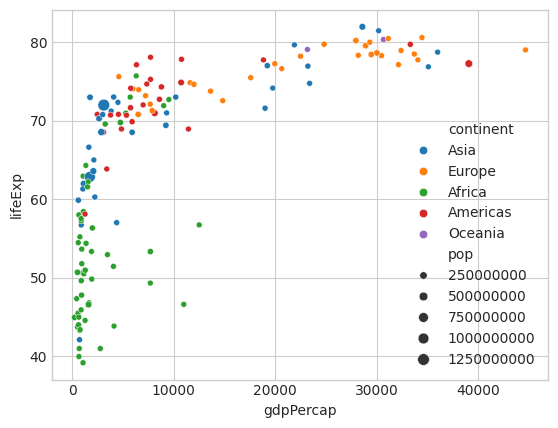

In [108]:
sns.scatterplot(data=df2002,x='gdpPercap',y='lifeExp',hue='continent',size='pop')

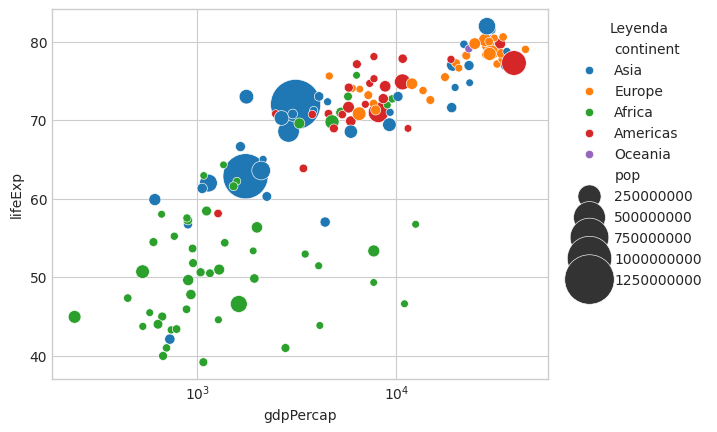

In [120]:
sns.scatterplot(data=df2002,x='gdpPercap',y='lifeExp',hue='continent',size='pop',legend=True,sizes=(30,1300))
plt.xscale('log')
plt.legend(loc='upper left',bbox_to_anchor=(1.03,1),title='Leyenda')